# Setup training framework

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler,
        valid_data, num_epochs, stats_interval, 
        notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, scheduler, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x1115ec0f0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x1115ec278>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

# Apply CosineAnnealingWithWarmRestarts to SGD

Epoch 1: 3.8s to complete
    error(train)=9.97e-01, acc(train)=6.81e-01, error(valid)=1.02e+00, acc(valid)=6.78e-01


Epoch 2: 3.4s to complete
    error(train)=6.76e-01, acc(train)=7.76e-01, error(valid)=7.13e-01, acc(valid)=7.66e-01


Epoch 3: 3.0s to complete
    error(train)=8.05e-01, acc(train)=7.34e-01, error(valid)=8.61e-01, acc(valid)=7.22e-01


Epoch 4: 2.7s to complete
    error(train)=5.46e-01, acc(train)=8.19e-01, error(valid)=6.05e-01, acc(valid)=8.05e-01


Epoch 5: 3.4s to complete
    error(train)=5.04e-01, acc(train)=8.25e-01, error(valid)=5.84e-01, acc(valid)=8.07e-01


Epoch 6: 2.7s to complete
    error(train)=5.28e-01, acc(train)=8.16e-01, error(valid)=6.18e-01, acc(valid)=7.98e-01


Epoch 7: 3.4s to complete
    error(train)=5.75e-01, acc(train)=8.11e-01, error(valid)=6.77e-01, acc(valid)=7.88e-01


Epoch 8: 3.6s to complete
    error(train)=7.27e-01, acc(train)=7.64e-01, error(valid)=8.24e-01, acc(valid)=7.45e-01


Epoch 9: 2.9s to complete
    error(train)=6.73e-01, acc(train)=7.80e-01, error(valid)=7.83e-01, acc(valid)=7.59e-01


Epoch 10: 3.6s to complete
    error(train)=5.63e-01, acc(train)=8.13e-01, error(valid)=6.74e-01, acc(valid)=7.90e-01


Epoch 11: 2.7s to complete
    error(train)=4.76e-01, acc(train)=8.38e-01, error(valid)=5.84e-01, acc(valid)=8.15e-01


Epoch 12: 2.5s to complete
    error(train)=4.34e-01, acc(train)=8.50e-01, error(valid)=5.52e-01, acc(valid)=8.24e-01


Epoch 13: 2.5s to complete
    error(train)=4.07e-01, acc(train)=8.58e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


Epoch 14: 2.5s to complete
    error(train)=3.89e-01, acc(train)=8.62e-01, error(valid)=5.34e-01, acc(valid)=8.30e-01


Epoch 15: 2.5s to complete
    error(train)=3.88e-01, acc(train)=8.61e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


Epoch 16: 2.7s to complete
    error(train)=3.83e-01, acc(train)=8.61e-01, error(valid)=5.44e-01, acc(valid)=8.23e-01


Epoch 17: 2.5s to complete
    error(train)=4.05e-01, acc(train)=8.54e-01, error(valid)=5.76e-01, acc(valid)=8.15e-01


Epoch 18: 2.5s to complete
    error(train)=4.22e-01, acc(train)=8.46e-01, error(valid)=5.96e-01, acc(valid)=8.11e-01


Epoch 19: 2.8s to complete
    error(train)=4.34e-01, acc(train)=8.46e-01, error(valid)=6.15e-01, acc(valid)=8.08e-01


Epoch 20: 2.5s to complete
    error(train)=4.98e-01, acc(train)=8.24e-01, error(valid)=6.77e-01, acc(valid)=7.87e-01


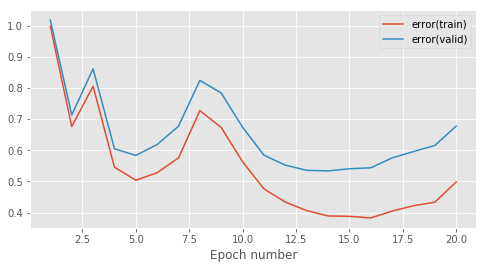

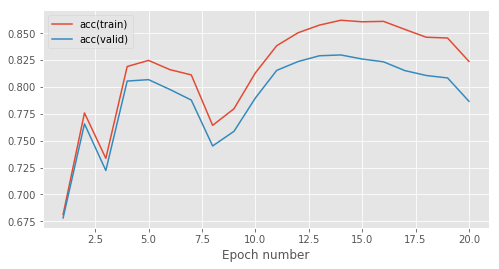

In [4]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

#setup hyperparameters
min_learning_rate = 1
max_learning_rate = 0.001
total_iters_per_period = 25
max_learning_rate_discount_factor = 0.8
period_iteration_expansion_factor = 3
num_epochs = 20

stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule()

scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate, max_learning_rate, total_iters_per_period, max_learning_rate_discount_factor,
                 period_iteration_expansion_factor)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True)